# Домашнее задание по библиотеке Pandas

## 📝 Описание данных


**Таблица Pays** (файл pays.csv) содержит данные о платежах между компаниями:

| **Название признака**         | **Описание** |
|------------------|-------------|
| *hash_inn_kt*   | Обезличенный ИНН отправителя |
| *hash_inn_dt*   | Обезличенный ИНН получателя |
| *week*          | Неделя |
| *count*         | Кол-во платежей в неделю |
| *sum*           | Сумма платежей в неделю (обезличенная) |


**Таблица inn_info_public** (файл inn_info_public.csv) содержит характеристики отдельных компаний:  

| **Название признака**         | **Описание** |
|------------------|-------------|
| *hash_inn*      | Обезличенный ИНН |
| *okved2*        | Обезличенная отрасль (ОКВЭД)|
| *region*        | Обезличенный регион |
| *is_public*     | Флаг публичной компании (True, если да) |

## 💫 Приступаем к работе

Теперь можно начинать! Импорт библиотеки pandas уже записан, для выполнения заданий достаточно только её, ~но если Вам захочется импортировать что-то ещё - это не возбраняется:)~.

Далее прочитайте файл удобным способом и выполняйте задания по порядку, код можно писать непосредственно сразу после условия задач, в отведённых под это ячейках.

*Совет (особенно для последних заданий): первым делом вдумайтесь в условие и прикиньте схему решения - какие таблицы Вам понадобятся, нужно ли что-то сгруппировать/объединить, по каким полям и с какими агрегирующими функциями... И только после этого приступайте к реализации задуманного на Python.*



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
pays = pd.read_csv("pays.csv")
inn = pd.read_csv("inn_info_public.csv")

### Задание 1

Выведите размерность (количество строк и столбцов) и первые 3 строки для каждой таблицы.

In [ ]:
print("Размер таблицы pays (строки, столбцы):", pays.shape)
print("Размер таблицы inn (строки, столбцы):", inn.shape)

display(pays.head(3))
display(inn.head(3))

pays shape: (5430150, 5)
inn shape: (240069, 4)


,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.6
1,0,0,5,2,399.6
2,0,0,7,2,79.6


,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False


### Задание 2
Посчитайте количество пропусков в каждой таблице по столбцам.

In [21]:
print("Количество пропусков по столбцам в pays:")
display(pays.isna().sum())

print("\nКоличество пропусков по столбцам в inn:")
display(inn.isna().sum())

Количество пропусков по столбцам в pays:


hash_inn_kt       0
hash_inn_dt       0
week              0
count             0
sum            1125
dtype: int64


Количество пропусков по столбцам в inn:


hash_inn     0
okved2       0
region       0
is_public    0
dtype: int64

### Задание 3
Определите количество уникальных компаний в таблице **pays** (как отправителей, так и получателей).

In [22]:
u_senders = pays["hash_inn_kt"].nunique()
u_receivers = pays["hash_inn_dt"].nunique()
u_all = pd.concat([pays["hash_inn_kt"], pays["hash_inn_dt"]]).nunique()

print("Уникальные отправители (hash_inn_kt):", u_senders)
print("Уникальные получатели (hash_inn_dt):", u_receivers)
print("Уникальные компании всего (отправители U получатели):", u_all)

Уникальные отправители (hash_inn_kt): 152160
Уникальные получатели (hash_inn_dt): 189772
Уникальные компании всего (отправители U получатели): 240071


### Задание 4

Найдите сумму и среднее количество платежей по неделям.

In [23]:
week_stats = pays.groupby("week", as_index=False).agg(
    суммарная_сумма=("sum", "sum"),
    среднее_количество=("count", "mean")
).sort_values("week")

print("Таблица по неделям (сумма и среднее число транзакций):")
display(week_stats)

Таблица по неделям (сумма и среднее число транзакций):


,week,суммарная_сумма,среднее_количество
0,0,4.774427e+05,3.111876
1,1,1.169804e+08,2.963132
2,2,9.530959e+07,2.885157
3,3,9.497736e+07,2.884061
4,4,9.439141e+07,2.844992
5,5,9.570163e+07,2.891892
6,6,9.127853e+07,2.941530
7,7,6.143893e+07,2.707992
8,8,1.174013e+08,2.962353
9,9,7.988996e+07,2.822412


### Задание 5

Определите 5 компаний (по `hash_inn_kt`), которые отправили наибольшую сумму платежей за весь период.

In [24]:
top5_senders = pays.groupby("hash_inn_kt", as_index=False)["sum"].sum() \
                   .sort_values("sum", ascending=False) \
                   .head(5)

print("Топ-5 отправителей по общей сумме платежей:")
display(top5_senders)

Топ-5 отправителей по общей сумме платежей:


,hash_inn_kt,sum
47936,81966,3.340752e+07
50069,85582,1.882592e+07
127274,217993,1.508303e+07
27856,47570,1.458800e+07
115091,196987,1.394582e+07


### Задание 6

По данным таблицы **inn_info_public** исследуйте распределение ОКВЭДов (подсчитайте для каждого типа ОКВЭДа сколько компаний из таблицы к нему относятся). Визуализируйте распределение *(поможет метод `hist`)*.

Всего компаний с okved2 != -1: 161415
Уникальных значений okved2: 80

Топ-10 okved2 по числу компаний:


okved2
12    44918
34    13654
14    10179
4      7617
52     6986
55     5493
8      4658
62     3498
61     3194
26     3141
Name: count, dtype: int64

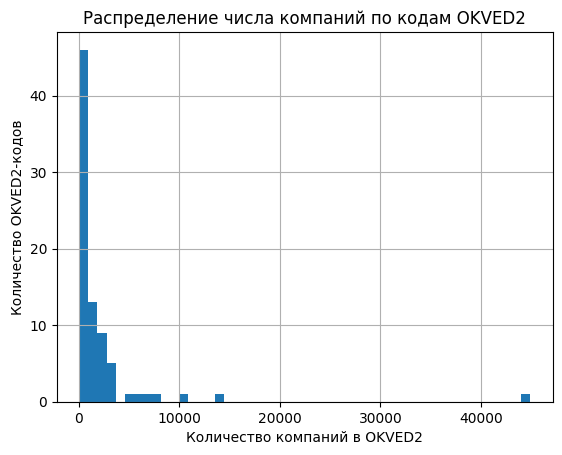

In [25]:
import matplotlib.pyplot as plt

inn_ok = inn.copy()
inn_ok = inn_ok[inn_ok["okved2"].notna()]
inn_ok = inn_ok[inn_ok["okved2"] != -1]

okved_counts = inn_ok["okved2"].value_counts()

print("Всего компаний с okved2 != -1:", len(inn_ok))
print("Уникальных значений okved2:", okved_counts.size)

print("\nТоп-10 okved2 по числу компаний:")
display(okved_counts.head(10))

plt.figure()
okved_counts.hist(bins=50)
plt.title("Распределение числа компаний по кодам OKVED2")
plt.xlabel("Количество компаний в OKVED2")
plt.ylabel("Количество OKVED2-кодов")
plt.show()

### Задание 7

Добавьте в таблицу Pays информацию об ОКВЭДе и регионе отправителя (`hash_inn_kt`) и получателя (`hash_inn_dt`).

*Подсказка: здесь нужно поработать с двумя таблицами одновременно*

In [26]:
inn_small = inn[["hash_inn", "okved2", "region", "is_public"]].copy()

pays_ext = pays.merge(
    inn_small, left_on="hash_inn_kt", right_on="hash_inn", how="left"
).rename(columns={
    "okved2": "okved2_kt",
    "region": "region_kt",
    "is_public": "is_public_kt"
}).drop(columns=["hash_inn"])

pays_ext = pays_ext.merge(
    inn_small, left_on="hash_inn_dt", right_on="hash_inn", how="left"
).rename(columns={
    "okved2": "okved2_dt",
    "region": "region_dt",
    "is_public": "is_public_dt"
}).drop(columns=["hash_inn"])

print("Первые 3 строки расширенной таблицы pays_ext:")
display(pays_ext.head(3))

print("Размер pays_ext (строки, столбцы):", pays_ext.shape)

Первые 3 строки расширенной таблицы pays_ext:


,hash_inn_kt,hash_inn_dt,week,count,sum,okved2_kt,region_kt,is_public_kt,okved2_dt,region_dt,is_public_dt
0,0,0,1,4,38399.6,-1,84,False,-1.0,84.0,False
1,0,0,5,2,399.6,-1,84,False,-1.0,84.0,False
2,0,0,7,2,79.6,-1,84,False,-1.0,84.0,False


Размер pays_ext (строки, столбцы): (5430150, 11)


### Задание 8


Используя результат, полученный в предыдущем задании, создайте таблицу, в которой для каждой отрасли (ОКВЭДа) указана сумма платежей, отправленных компаниями из этой отрасли.

In [27]:
table_okved_week = pays_ext.pivot_table(
    index="week",
    columns="okved2_kt",
    values="sum",
    aggfunc="sum",
    fill_value=0
).sort_index()

print("Сводная таблица: неделя x okved2 отправителя (сумма платежей):")
display(table_okved_week.head())

Сводная таблица: неделя x okved2 отправителя (сумма платежей):


okved2_kt,-1,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,78,79
week,,,,,,,,,,,,,,,,,,,,,
0,1.683769e+05,1443.600,69.832,0.000,0.000,3926.124,8.000,1265.432,45.236,52.232,...,25.184,1.520,3841.484,0.000,2226.540,66.948,1109.912,346.064,672.140,5.744
1,3.726242e+07,127376.976,1120.340,7257293.660,10790.292,4469972.468,72486.916,209256.004,156916.904,798240.692,...,128699.452,95577.216,318794.980,3345.164,1683223.936,87832.668,1222221.756,13838.424,790132.976,376541.124
2,3.218878e+07,130389.116,1501.044,1992813.612,29200.076,5437167.932,30349.980,139533.220,93871.280,739008.464,...,135626.480,48742.804,203837.524,608.380,1884603.468,105516.328,687846.712,43693.320,419340.988,202110.936
3,2.996723e+07,142232.096,778.264,1414262.360,17185.176,4812911.168,35665.848,188144.664,115460.888,997063.508,...,153902.076,71933.048,156466.196,2313.964,1663666.660,81534.336,1243950.436,10210.808,451337.324,182572.944
4,2.744441e+07,144538.796,1250.264,490770.124,38976.252,7094672.052,22987.944,117140.800,106988.588,841905.584,...,113071.984,41873.976,1079821.128,2340.604,1396607.016,35597.192,1361275.312,25533.004,506166.360,133519.388


### Задание 9
Определите, какую долю от общего объема составляют платежи, где отправитель и получатель находятся в разных регионах.

In [28]:
total_volume = pays_ext["sum"].sum()

diff_region_volume = pays_ext.loc[
    (pays_ext["region_kt"].notna()) & (pays_ext["region_dt"].notna()) &
    (pays_ext["region_kt"] != pays_ext["region_dt"]),
    "sum"
].sum()

share = diff_region_volume / total_volume if total_volume != 0 else 0

print("Общий объем платежей:", total_volume)
print("Объем платежей между разными регионами:", diff_region_volume)
print("Доля платежей между разными регионами:", share)

Общий объем платежей: 2138712519.9439998
Объем платежей между разными регионами: 736725777.4960003
Доля платежей между разными регионами: 0.34447162516039825


### Задание 10
Определите среднюю сумму платежей для публичных (`is_public == 1`) и непубличных компаний (`is_public == 0`).

In [29]:
avg_sum_public = pays_ext.groupby("is_public_kt", as_index=False)["sum"].mean() \
                         .rename(columns={"sum": "средняя_сумма"})

print("Средняя сумма платежа в зависимости от публичности отправителя (is_public_kt):")
display(avg_sum_public)

Средняя сумма платежа в зависимости от публичности отправителя (is_public_kt):


,is_public_kt,средняя_сумма
0,False,395.533365
1,True,393.207246
